In [1]:
import os
import PyPDF2
import fitz

In [2]:
dir = 'annoted_sustainability_reports/Info_Tech'
 

In [3]:
highlight_list = []
rel_text = []

for file in os.listdir(dir):
    f = os.path.join(dir, file)
    print(f)

    doc = fitz.open(f)
    print(doc)
    result = []
    
    for page in doc:

        highlights = []
        annot = page.first_annot
        while annot:
            if annot.type[0] == 8:
                all_coordinates = annot.vertices
                try:
                    if len(all_coordinates) == 4:
                        highlight_coord = fitz.Quad(all_coordinates).rect
                        highlights.append(highlight_coord)
                    else:
                        all_coordinates = [all_coordinates[x:x+4] for x in range(0, len(all_coordinates), 4)]
                        for i in range(0,len(all_coordinates)):
                            coord = fitz.Quad(all_coordinates[i]).rect
                            highlights.append(coord)
                except:
                    print("NoneType found")
            annot = annot.next

        all_words = page.get_text_words()
        highlight_text = []
        if len(highlights) > 0:
            for h in highlights:
                sentence = []
                for w in all_words:
                    if fitz.Rect(w[0:4]).intersects(h):
                        sentence.append(w[4])
                highlight_text.append(" ".join(sentence))
        if len(highlight_text) > 0:
            result.append(" ".join(highlight_text))
        

    s = ""
        
    for r in result:
        if r is not None:
            s += r
        
    #create array of highlighted sentences in the pdf
    highlighted_sentences = s.split('.')

    print(highlighted_sentences, "\n", len(highlighted_sentences))

    rel_text.append(highlighted_sentences)

    num_highlighted = len(highlighted_sentences)

    highlight_list.append(num_highlighted)


annoted_sustainability_reports/Info_Tech/Accenture_FY2021_Statutory_Sustainability_report.pdf
Document('annoted_sustainability_reports/Info_Tech/Accenture_FY2021_Statutory_Sustainability_report.pdf')
['In this context we announced three new industry-leading environmental goals in October 2020: achieve net-zero emissions by 2025, move to zero waste and plan for water risk', 'We’ll focus first on actual reductions in our emissions by powering our offices with 100% renewable energy, engaging key suppliers to reduce their emissions and equipping our people to make climate-smart travel decisions', ' To address remaining emissions, we’ll invest in proprietary, nature-based carbon removal solutions, such as large-scale tree planting, that will directly remove carbon emissions from the atmosphere', ' In addition, at Accenture in Sweden, we have committed to reduce our CO2 emissions from air travel with 50% per employee by 2023, with fiscal year 2018 as the baseline', ' To reach our net-zero go

In [4]:
#Extracting all sentences from the file
sentences_list = []
all_text = []

for file in os.listdir(dir):
    f = os.path.join(dir, file)
    print(f)

    pdfFileObj = open(f, 'rb') 
    pdfReader = PyPDF2.PdfFileReader(pdfFileObj) 

    t = ""

    for count in range(len(fitz.open(f))):
        # print(count)
        pageObj = pdfReader.getPage(count)
        t += pageObj.extractText()
        

    pdfFileObj.close() 
    total_sentences = t.split('.')
    print(len(total_sentences))

    all_text.append(total_sentences)

    num_sentences = len(total_sentences)

    sentences_list.append(num_sentences)

#1910 total sentences in Amazon_2021_sustainability_report.pdf


annoted_sustainability_reports/Info_Tech/Accenture_FY2021_Statutory_Sustainability_report.pdf
648
annoted_sustainability_reports/Info_Tech/Broadcom_ESG_report.pdf
717
annoted_sustainability_reports/Info_Tech/Mastercard_2021_Sustainability_report.pdf
1499
annoted_sustainability_reports/Info_Tech/Nvidia_2022_CSR_report.pdf
1226
annoted_sustainability_reports/Info_Tech/Oracle_2020_Corporate_Citizenship_report.pdf
647
annoted_sustainability_reports/Info_Tech/Cisco_2021_Purpose_report.pdf
1751
annoted_sustainability_reports/Info_Tech/Microsoft_2021_Environmental_Sustainability_Report.pdf
2067
annoted_sustainability_reports/Info_Tech/VIsa_2020_ESG_report.pdf
2803
annoted_sustainability_reports/Info_Tech/Adobe_2021_CSR_Report.pdf
340
annoted_sustainability_reports/Info_Tech/Apple_2022_Environmental_Progress_Report.pdf
2464


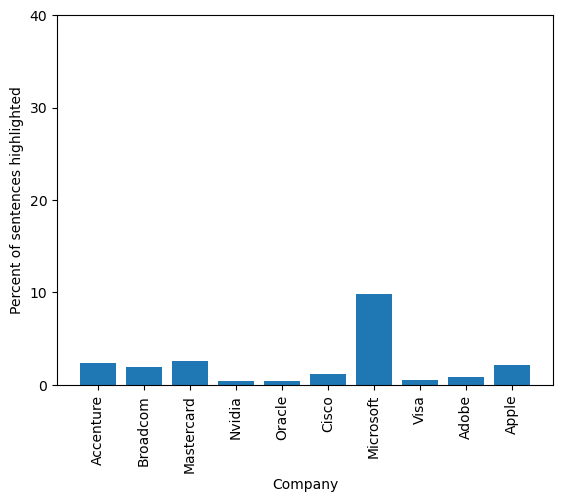

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import glob
y = []

x = ["Accenture", "Broadcom", "Mastercard", "Nvidia", "Oracle", "Cisco", "Microsoft", "Visa", "Adobe", "Apple"]

i = 0

for file in os.listdir(dir):
    y.append(100 * (highlight_list[i])/sentences_list[i])
    i = i+1

plt.bar(x, y, width = 0.8)
plt.xticks(rotation='vertical')
plt.xlabel("Company")
plt.ylabel("Percent of sentences highlighted")
plt.yticks(np.arange(0, 50, 10))
plt.show()

In [6]:
import pandas as pd

series = pd.Series(y)
series.describe()

count    10.000000
mean      2.230154
std       2.806938
min       0.407830
25%       0.595187
50%       1.575947
75%       2.263709
max       9.869376
dtype: float64

In [7]:
#storing variable so they can be called between notebooks (for ML and aggregate work later on)

IT_reltext = rel_text
IT_alltext = all_text

%store IT_reltext
%store IT_alltext

Stored 'IT_reltext' (list)
Stored 'IT_alltext' (list)
